## Desafío - Boosting Classifiers



<br>
<div class="alert alert-block alert-success">

<b>Nombre:</b> Julio Valdés.

<b>Generación:</b> G5.

<b>Profesor:</b> Gabriel Tamayo L.

</div>

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción
* Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones churn. Los atributos existentes hacen referencia a características de la cuenta de cada cliente. Lista de atributos:
    * State: Estado de Estados Unidos
    * Account Length: Tiempo en que la cuenta ha sido activada
    * Area Code: código de área.
    * international plan: Plan internacional activiado
    * voice mail plan: Plan de mensajes de voz activado
    * number_vmail_messages: Cantidad de mensajes de voz.
    * total_day_minutes: Cantidad de minutos ocupados en la mañana.
    * total_day_calls: Cantidad de llamadas realizadas en la mañana.
    * total_day_charge: Cobros realizados en la mañana.
    * total_eve_minutes: Cantidad de minutos ocupados en la tarde.
    * total_eve_calls: Cantidad de llamadas realizadas en la tarde.
    * total_eve_charge: Cobros realizados en la tarde.
    * total_night_calls: Cantidad de llamadas realizadas en la noche.
    * tota_night_minutes: Cantidad de minutos ocupados en la noche.
    * total_night_charge: Cobros realizados en la noche.
    * total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
    * total_intl_calls: Cantidad de llamadas internacionales realizadas.
    * total_intl_charge: Cobros realizados por llamadas internacionales.
    * churn: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R .

### Ejercicio 1: Preprocesamiento

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
* Para las variables categóricas, recodifíquelas en variables binarias.

In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


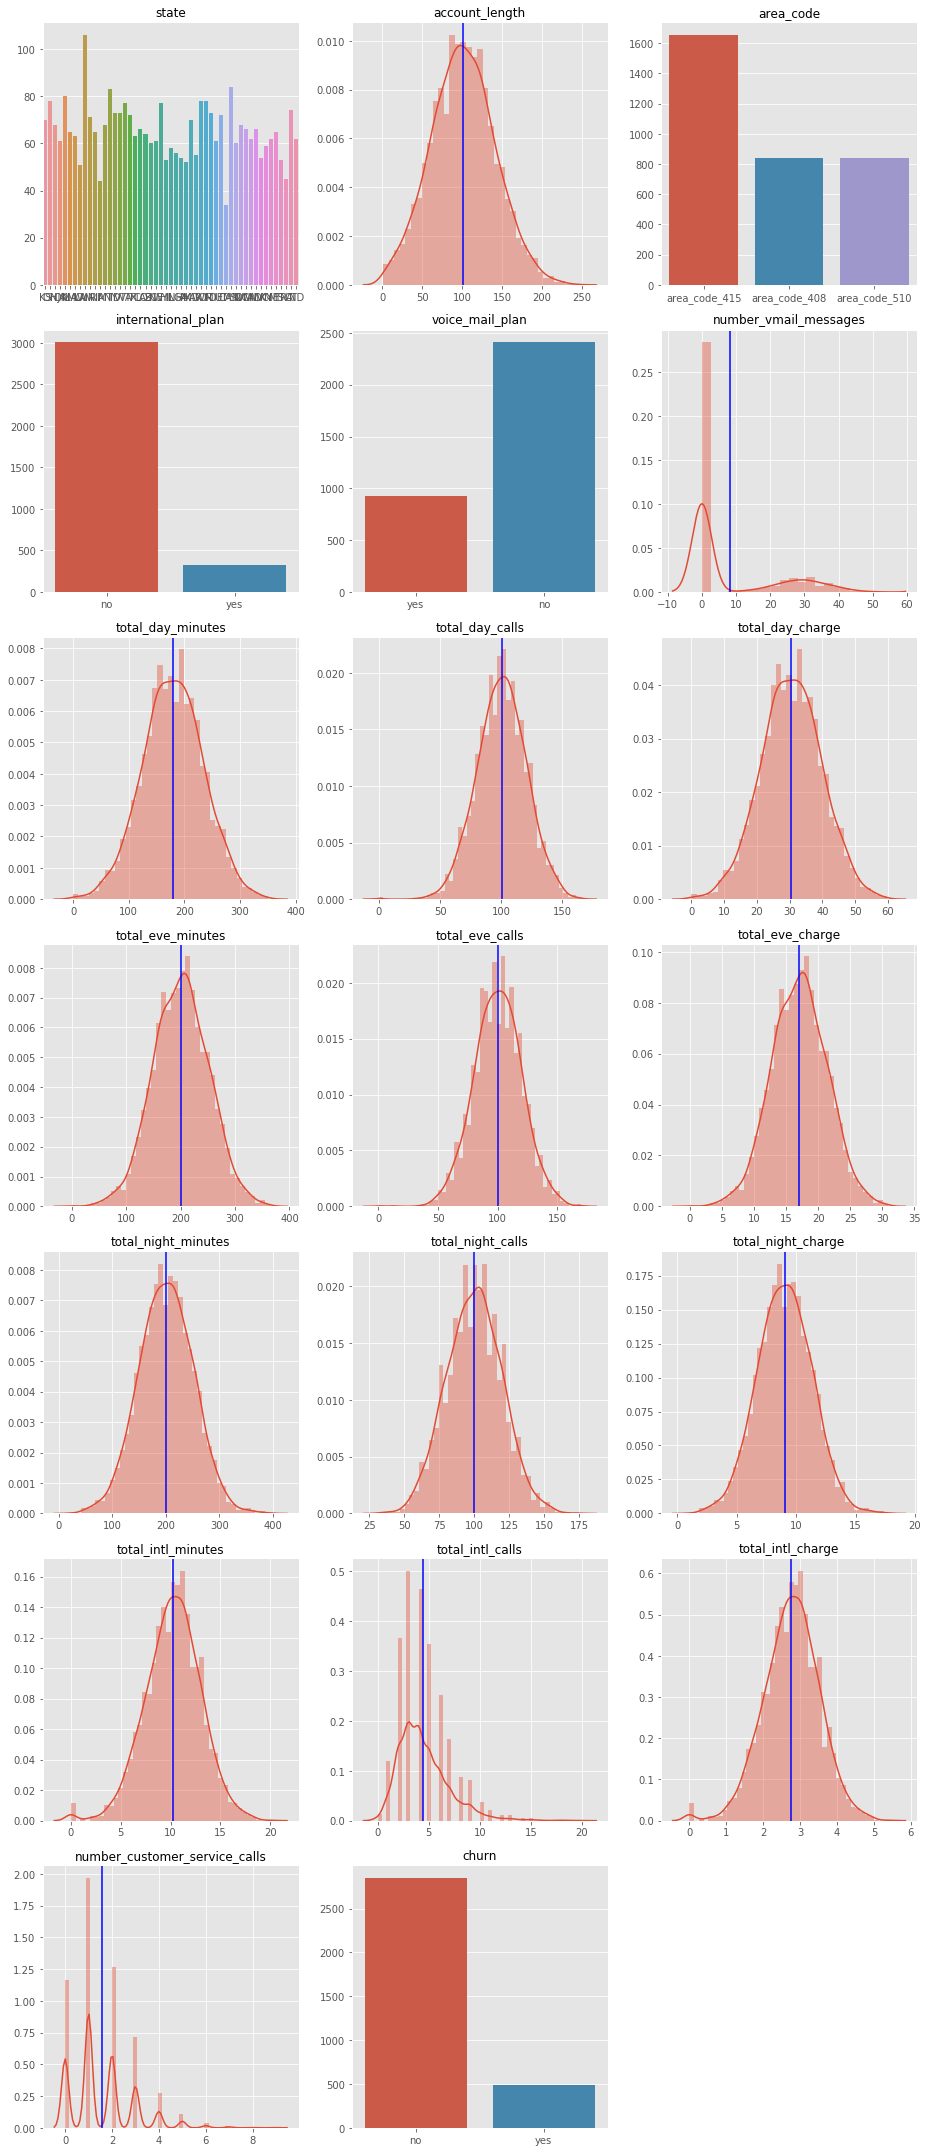

In [28]:
plt.figure(figsize=(13, 30))
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(7, 3, index + 1)
    if serie.dtype == object:
        sns.countplot(serie)
    else:
        sns.distplot(serie)
        plt.axvline(np.mean(serie),color = 'blue')
    plt.title(colname, fontsize=12)
    plt.xlabel('');
    plt.ylabel('');
plt.tight_layout()

#### Comentarios
* Las variables account_length, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_charge distribuyen de forma normal. 
* Las variables international_plan y voice_mail_plan presentan un desbalanceo de clases considerable.
* La variable dependiente churn presenta desbalanceo de clases.
* La variable number_vmail_messages no distribuye de forma normal

In [29]:
columns = df.columns
for i in columns:
    if df[i].dtype == object:
        df = pd.concat([df,pd.get_dummies(df[i], drop_first = True, prefix=i)], axis=1)
        df = df.drop(i, axis=1)

In [30]:
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting, para mejorar su capacidad predictiva implemente una búsqueda de grilla con las siguientes especificaciones:

| Modelo   |      Grilla      |
|----------|:-------------:|
| AdaBoostClassifier |  {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]} |  
| GradientBoostingClassifier |    {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}   |   
 


* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['churn_yes']),df['churn_yes'], test_size=.33, random_state=1234)

#### Modelo AdaBoostClassifier

In [54]:
ada_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}

ada_grid = GridSearchCV(AdaBoostClassifier(random_state=1234), param_grid = ada_param_grid, cv=3, n_jobs=-1).fit(X_train, y_train)

In [55]:
ada_y_hat = ada_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, ada_y_hat))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       938
           1       0.64      0.40      0.49       162

   micro avg       0.88      0.88      0.88      1100
   macro avg       0.77      0.68      0.71      1100
weighted avg       0.86      0.88      0.87      1100



#### Modelo GradientBoostingClassifier

In [57]:
gb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1, 0.5, 0.9],
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state = 1234), param_grid = gb_param_grid, cv=3, n_jobs=-1).fit(X_train, y_train)

In [58]:
gb_y_hat = gb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, gb_y_hat))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       938
           1       0.89      0.77      0.83       162

   micro avg       0.95      0.95      0.95      1100
   macro avg       0.93      0.88      0.90      1100
weighted avg       0.95      0.95      0.95      1100



#### Comentarios
* El modelo GradientBoostingClassifier presenta un indicador f1-score superior en 0.08 puntos que el modelo AdaBoostClassifier. 

### Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

</div>


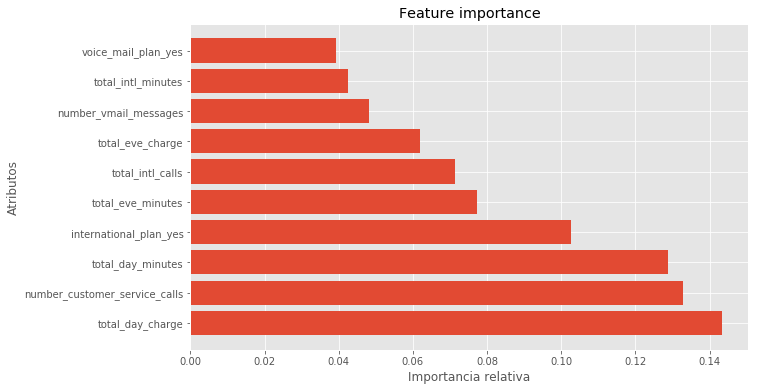

In [59]:
def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1][:10]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(names)), tmp_importance[sort_importance])
    plt.yticks(range(len(names)), names, rotation=0)
    
plot_importance(gb_grid.best_estimator_, df.drop(columns = 'churn_yes').columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

#### Comentarios
* Los principales factores que aumentan la probabilidad de fuga de los clientes son: total_day_charge, number_customer_service_calls, total_day_minutes e international_plan_yes.

### Ejercicio 4: Probabilidad de fuga
* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
* Implemente el modelo predictivo con el archivo churn_test.csv .
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [70]:
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
serie_state = df_test['state']
for i in df_test.columns:
    if df_test[i].dtype == object:
        df_test = pd.concat([df_test, pd.get_dummies(df_test[i], drop_first = True, prefix=i)], axis=1)
        df_test = df_test.drop(i, axis=1)

In [71]:
df_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,...,0,0,0,0,0,0,1,0,0,0
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,...,0,0,0,0,0,0,1,0,0,0
2,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,...,0,0,0,0,0,0,0,0,1,0
3,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,...,0,0,0,0,0,1,0,0,0,0
4,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,...,0,0,0,0,0,1,0,0,0,0


In [72]:
y_hat_test = gb_grid.best_estimator_.predict_proba(df_test.drop(columns=['churn_yes']))

In [107]:
prob = []
for value in y_hat_test:
    prob.append(value[1])

In [108]:
data = {'state': serie_state, 'prob': prob}
df_result = pd.DataFrame(data = data)

In [117]:
df_result = df_result.groupby(['state']).mean().sort_values(by=['prob'], ascending = False)
print(df_result[:3])

           prob
state          
NJ     0.269746
OK     0.251034
NM     0.211920


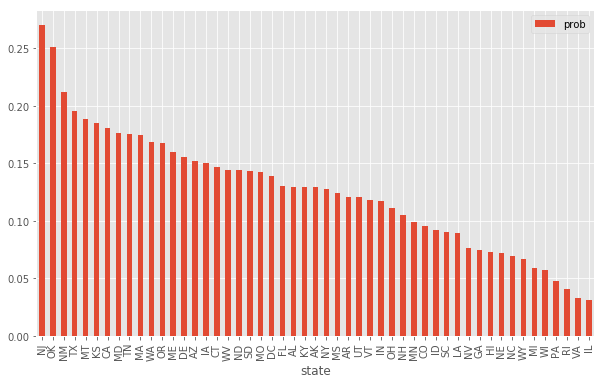

In [120]:
df_result.plot(kind = 'bar');

#### Comentarios
* Los tres estados con mayor probabilidad de fuga de clientes son: NJ, OK y NM.